# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 619


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | chiriqui grande
Processing Record 6 of Set 1 | butaritari
Processing Record 7 of Set 1 | kedougou
Processing Record 8 of Set 1 | pyapon
Processing Record 9 of Set 1 | chokurdakh
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | nanortalik
Processing Record 12 of Set 1 | broken hill
Processing Record 13 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 14 of Set 1 | bambous virieux
Processing Record 15 of Set 1 | limon
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | lebedinyy
Processing Record 20 of Set 1 | constitucion
Processing Record 21 

Processing Record 39 of Set 4 | half moon bay
Processing Record 40 of Set 4 | isangel
Processing Record 41 of Set 4 | ntchisi
Processing Record 42 of Set 4 | alugan
Processing Record 43 of Set 4 | slave lake
Processing Record 44 of Set 4 | davila
Processing Record 45 of Set 4 | san ramon
Processing Record 46 of Set 4 | ilulissat
Processing Record 47 of Set 4 | paracuru
Processing Record 48 of Set 4 | warrington
Processing Record 49 of Set 4 | oriximina
Processing Record 0 of Set 5 | gizo
Processing Record 1 of Set 5 | zhangye
Processing Record 2 of Set 5 | saleaula
City not found. Skipping...
Processing Record 3 of Set 5 | nikolskoye
Processing Record 4 of Set 5 | deputatskiy
Processing Record 5 of Set 5 | eureka
Processing Record 6 of Set 5 | ixtapa
Processing Record 7 of Set 5 | vila franca do campo
Processing Record 8 of Set 5 | husavik
Processing Record 9 of Set 5 | marcona
City not found. Skipping...
Processing Record 10 of Set 5 | manavalakurichi
Processing Record 11 of Set 5 | f

Processing Record 28 of Set 8 | mbuji-mayi
Processing Record 29 of Set 8 | yining
Processing Record 30 of Set 8 | suifenhe
Processing Record 31 of Set 8 | harper
Processing Record 32 of Set 8 | batagay
Processing Record 33 of Set 8 | andenes
Processing Record 34 of Set 8 | bonthe
Processing Record 35 of Set 8 | forio
Processing Record 36 of Set 8 | neiafu
Processing Record 37 of Set 8 | oranjemund
Processing Record 38 of Set 8 | sept-iles
Processing Record 39 of Set 8 | medea
Processing Record 40 of Set 8 | biggar
Processing Record 41 of Set 8 | te anau
Processing Record 42 of Set 8 | ginda
Processing Record 43 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 44 of Set 8 | samarai
Processing Record 45 of Set 8 | hongjiang
Processing Record 46 of Set 8 | jabiru
City not found. Skipping...
Processing Record 47 of Set 8 | ndjole
Processing Record 48 of Set 8 | kaohsiung
Processing Record 49 of Set 8 | vao
Processing Record 0 of Set 9 | khvatovka
Processing Record 1 of Set

Processing Record 19 of Set 12 | hobyo
Processing Record 20 of Set 12 | gorontalo
Processing Record 21 of Set 12 | denpasar
Processing Record 22 of Set 12 | vanavara
Processing Record 23 of Set 12 | yamada
Processing Record 24 of Set 12 | ardahan
Processing Record 25 of Set 12 | goderich
Processing Record 26 of Set 12 | bowen
Processing Record 27 of Set 12 | phangnga
Processing Record 28 of Set 12 | helong
Processing Record 29 of Set 12 | xining
Processing Record 30 of Set 12 | rock sound
Processing Record 31 of Set 12 | malaya purga
Processing Record 32 of Set 12 | conceicao da barra
Processing Record 33 of Set 12 | krasnoselkup
Processing Record 34 of Set 12 | nome
Processing Record 35 of Set 12 | arcachon
Processing Record 36 of Set 12 | mansa
Processing Record 37 of Set 12 | carutapera
Processing Record 38 of Set 12 | arrecife
Processing Record 39 of Set 12 | izhma
Processing Record 40 of Set 12 | aguadilla
Processing Record 41 of Set 12 | kasongo
Processing Record 42 of Set 12 | t

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hobart,-42.8794,147.3294,67.26,56,20,12.66,AU,1680571803
1,vaini,-21.2000,-175.2000,84.36,70,20,8.05,TO,1680571804
2,rikitea,-23.1203,-134.9692,79.68,83,98,14.65,PF,1680571828
3,chiriqui grande,8.9500,-82.1167,77.09,88,99,2.17,PA,1680571838
4,butaritari,3.0707,172.7902,81.84,81,80,18.14,KI,1680571840


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [ ]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

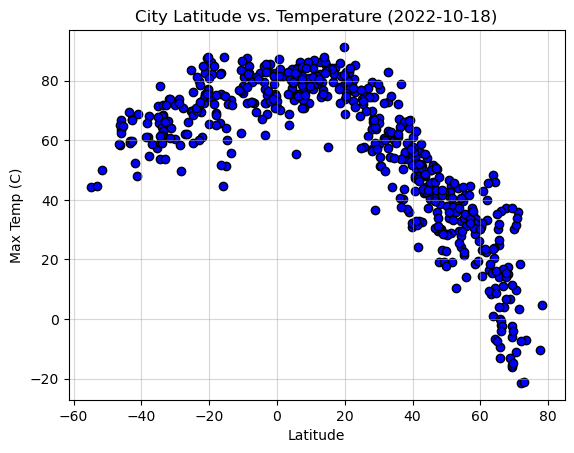

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], facecolor = "blue", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (2022-10-18)")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
plt.grid(alpha=.5)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

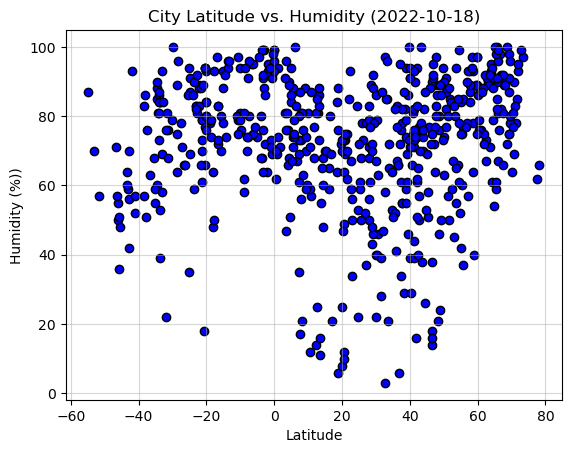

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], facecolor = "blue", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%))')
plt.grid(alpha=.5)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

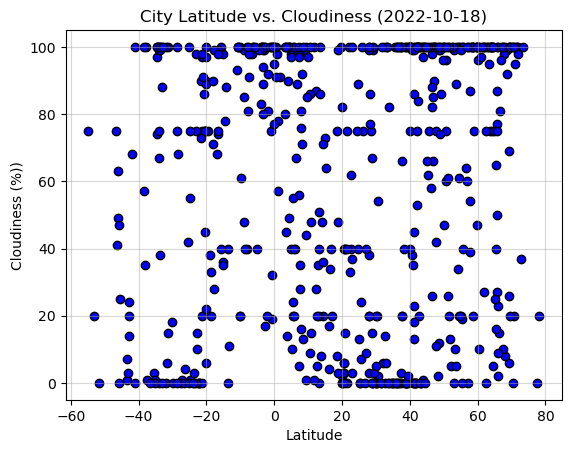

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], facecolor = "blue", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%))')
plt.grid(alpha=.5)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

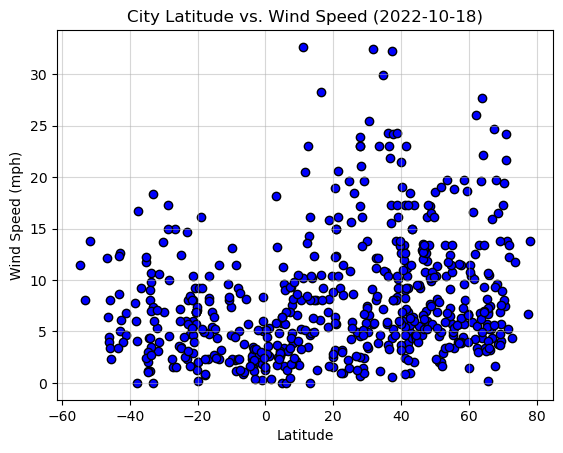

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], facecolor = "blue", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel('Latitude')
# Used imperial units, hence the (mph) switch from (m/s)
plt.ylabel('Wind Speed (mph)')
plt.grid(alpha=.5)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [59]:
# Define a function to create Linear Regression plots
def LRplot(xval,yval,textspot):
    (slope, intercept, rvalue, pvalue, stderr) = linregress (xval,yval)
    regressval = xval * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    plt.scatter(xval,yval)
    plt.plot(xval,regressval,"r-")
    plt.annotate(line_eq,textspot,color="red",fontsize=15)
    plt.xlabel("Latitude")
    plt.show()

In [60]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >=0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,chiriqui grande,8.9500,-82.1167,77.09,88,99,2.17,PA,1680571838
4,butaritari,3.0707,172.7902,81.84,81,80,18.14,KI,1680571840
5,kedougou,12.5579,-12.1743,86.13,25,5,3.47,SN,1680571840
6,pyapon,16.2833,95.6833,84.34,59,4,10.45,MM,1680571840
7,chokurdakh,70.6333,147.9167,9.73,90,20,7.43,RU,1680571841


In [61]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <=0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hobart,-42.8794,147.3294,67.26,56,20,12.66,AU,1680571803
1,vaini,-21.2000,-175.2000,84.36,70,20,8.05,TO,1680571804
2,rikitea,-23.1203,-134.9692,79.68,83,98,14.65,PF,1680571828
8,ushuaia,-54.8000,-68.3000,44.26,87,75,11.50,AR,1680571841
10,broken hill,-31.9500,141.4333,73.67,22,0,5.30,AU,1680571843


###  Temperature vs. Latitude Linear Regression Plot

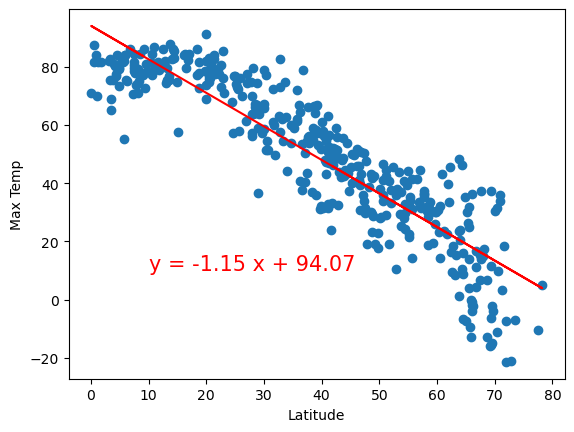

In [65]:
# Linear regression on Northern Hemisphere
xval = northern_hemi_df['Lat']
yval = northern_hemi_df['Max Temp']
plt.ylabel('Max Temp')
LRplot(xval,yval,(10,10))

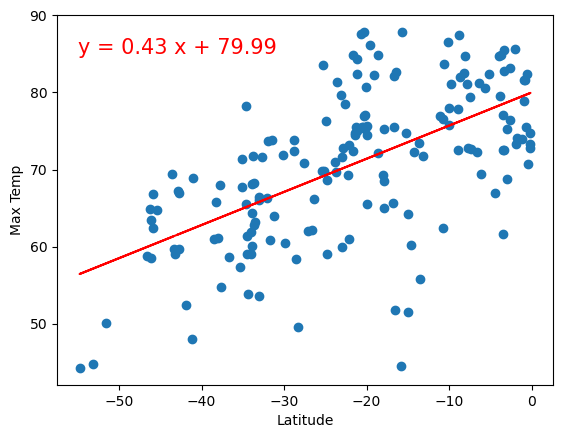

In [69]:
# Linear regression on Southern Hemisphere
xval = southern_hemi_df['Lat']
yval = southern_hemi_df['Max Temp']
plt.ylabel('Max Temp')
LRplot(xval,yval,(-55,85))

**Discussion about the linear relationship:** For the Northern hemisphere the regression line shows that as latitude increases, max temperature decreases. The opposite is true for the Southern hemisphere's regression line, where an increase in latitude correlates to an increase in temperature.

### Humidity vs. Latitude Linear Regression Plot

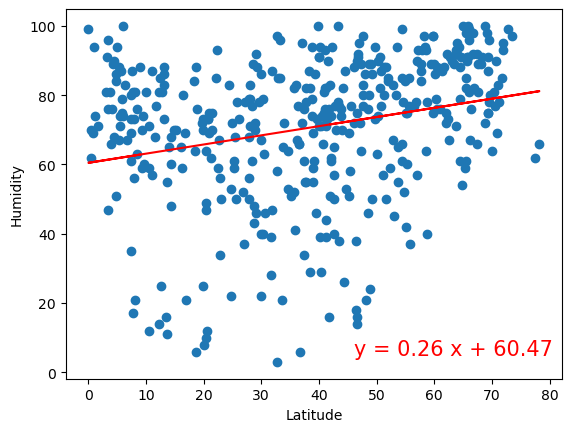

In [78]:
# Northern Hemisphere
xval = northern_hemi_df['Lat']
yval = northern_hemi_df['Humidity']
plt.ylabel('Humidity')
LRplot(xval,yval,(46,5))

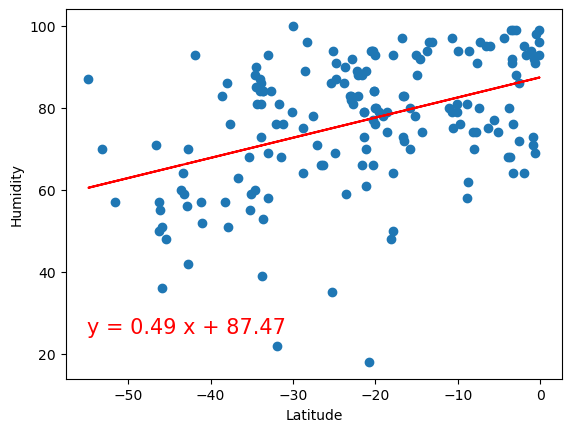

In [81]:
# Southern Hemisphere
xval = southern_hemi_df['Lat']
yval = southern_hemi_df['Humidity']
plt.ylabel('Humidity')
LRplot(xval,yval,(-55,25))

**Discussion about the linear relationship:** For the Northern hemisphere the regression line shows a positive correlation between latitude and humidity, meaning that as latitude increases, so does humidity. For the Southern hemisphere the trend continues in a positive correlation where humidity increases as latitude increases.

### Cloudiness vs. Latitude Linear Regression Plot

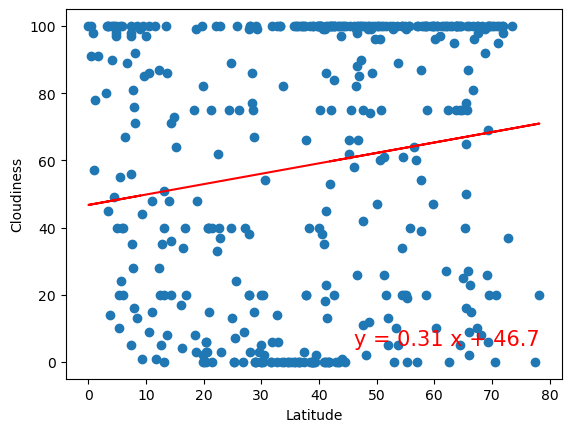

In [82]:
# Northern Hemisphere
xval = northern_hemi_df['Lat']
yval = northern_hemi_df['Cloudiness']
plt.ylabel('Cloudiness')
LRplot(xval,yval,(46,5))

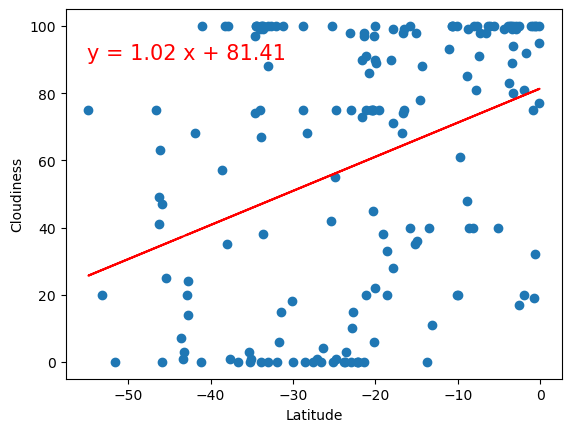

In [84]:
# Southern Hemisphere
xval = southern_hemi_df['Lat']
yval = southern_hemi_df['Cloudiness']
plt.ylabel('Cloudiness')
LRplot(xval,yval,(-55,90))

**Discussion about the linear relationship:** Similar to the relationship between latitude and humidity, cloudiness increases as latitude increases across the dataset. It is worth noting that the increase per latitude tick is much more pronounced in the Southern hemisphere though.

### Wind Speed vs. Latitude Linear Regression Plot

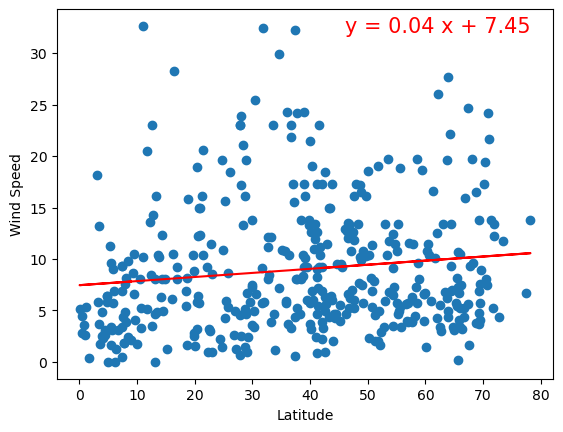

In [86]:
# Northern Hemisphere
xval = northern_hemi_df['Lat']
yval = northern_hemi_df['Wind Speed']
plt.ylabel('Wind Speed')
LRplot(xval,yval,(46,32))

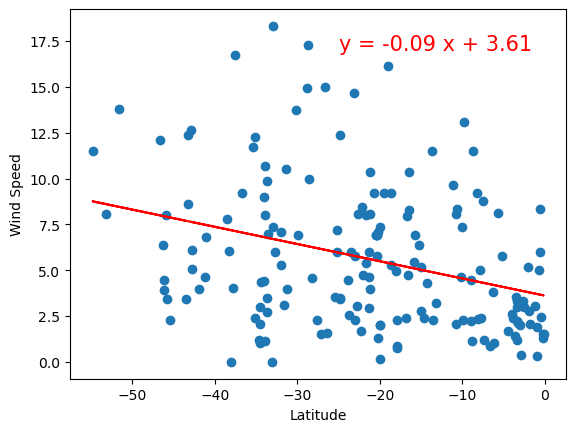

In [90]:
# Southern Hemisphere
xval = southern_hemi_df['Lat']
yval = southern_hemi_df['Wind Speed']
plt.ylabel('Wind Speed')
LRplot(xval,yval,(-25,17))

**Discussion about the linear relationship:** For the Northern hemisphere there is a positive correlation suggesting that as latitude ticks up, so does wind speed. For the Southern hemisphere it is the opposite, there is a negative correlation so as latitude ticks up, wind speed reduces.